# Visualización

In [1]:
import wbdata
import pandas
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## World Bank Data API

Vemos el principal funcionamiento de la API

In [2]:
# Todas las fuentes de datos disponibles en la API.
wbdata.get_source()  

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

In [3]:
# Elegimos source=14 que son datos de educación (Barro-Lee dataset)
wbdata.get_indicator(source=12)  

id                             name
-----------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------
BAR.NOED.1519.FE.ZS            Barro-Lee: Percentage of female population age 15-19 with no education
BAR.NOED.1519.ZS               Barro-Lee: Percentage of population age 15-19 with no education
BAR.NOED.15UP.FE.ZS            Barro-Lee: Percentage of female population age 15+ with no education
BAR.NOED.15UP.ZS               Barro-Lee: Percentage of population age 15+ with no education
BAR.NOED.2024.FE.ZS            Barro-Lee: Percentage of female population age 20-24 with no education
BAR.NOED.2024.ZS               Barro-Lee: Percentage of population age 20-24 with no education
BAR.NOED.2529.FE.ZS            Barro-Lee: Percentage of female population age 25-29 with no education
BAR.NOED.2529.ZS               Barro-Lee: Percentage of population age 25-29 wi

## Graficando con Pandas

## Serie de tiempo

In [4]:
# Vemos la educacion en la poblacion a lo largo de los años 
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)


# Porcentaje de no educacion en la población
indicators = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24', 
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

df = wbdata.get_dataframe(indicators, country = 'ARG', data_date = date_time)
# La data recolectada es cada 5 años
df.dropna(inplace=True)

Text(0.5, 0, 'Edad')

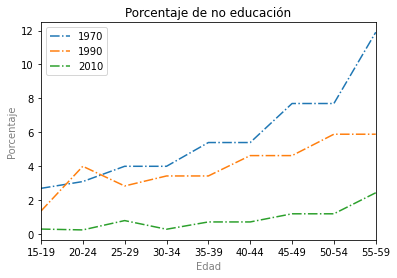

In [5]:
# Porcentajes de la poblacion no educado
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')

In [6]:
# Vemos la educacion en las mujeres a lo largo de los años
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)

# Porcentaje de mujeres sin educacion por rango etario
indicators = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24', 
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicators, country = 'ARG', data_date=date_time)
# La data recolectada es cada 5 años
df1.dropna(inplace = True)

Text(0.5, 0, 'Edad')

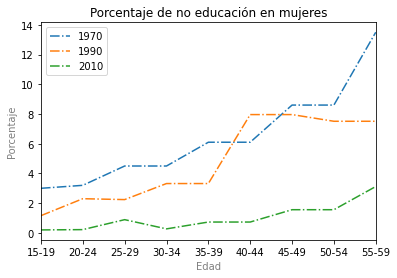

In [7]:
# Porcentajes de mujeres no educadas
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación en mujeres')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')

Text(0, 0.5, 'Porcentaje')

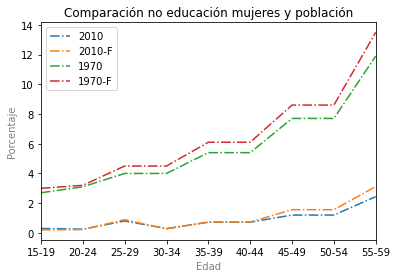

In [8]:
# Comparamos la educación en 2010 y 1970 ente mujeres y la población
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True) 
#1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')

Vemos que luego de 40 años la brecha se acoto.

# Otros gráficos

## Gráficos de barras

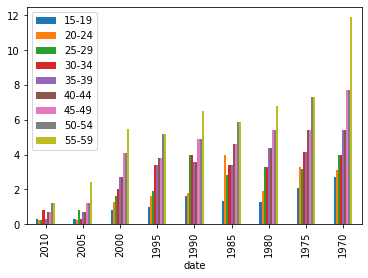

In [18]:
# Grafico de barras 
df.plot(kind='bar')

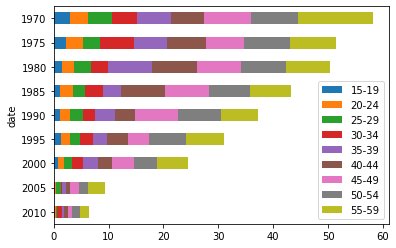

In [25]:
# Ahora lo hacemos horizontal y apilados
df1.plot.barh(stacked=True)

## Histogramas

Vamos a trabajar con el 'Indice de facilidad para hacer negocios' en paises con PIB per capita muy bajos o muy altos.

Mas informacion: https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios

In [107]:
# Seleccionamos los paises a utilizar (LIC = Low income, HIC = High income)
paises = [i['id'] for i in wbdata.get_country(incomelevel=['LIC','HIC'])]

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"} 

# Creamos el datframe
df = wbdata.get_dataframe(indicadores, country=paises, convert_date=True)   

In [108]:
# Nos quedamos con los datos en los que sí tenemos el indice
df.dropna(inplace=True)

Text(0, 0.5, 'Frecuencia')

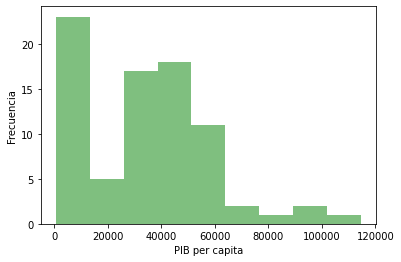

In [121]:
# Creamos el gráfico
plt.figure()
df['PIBPC'].plot.hist(alpha=0.5,  # Con alpha seteamos la transparencia
                     color='g',
                     bins=9)
plt.xlabel('PIB per capita')
plt.ylabel('Frecuencia')

# Box plot

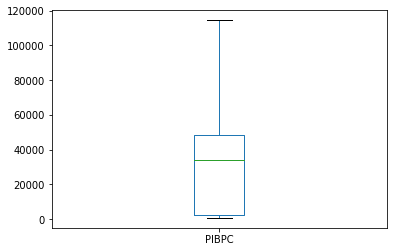

In [122]:
df['PIBPC'].plot.box()

# Scatter plot

Text(0, 0.5, 'PIB per capita')

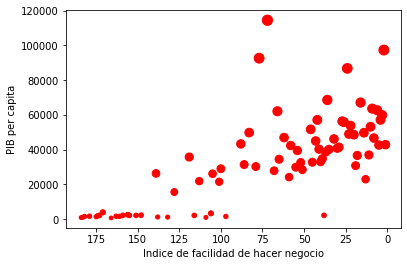

In [153]:
# Grafico de puntos
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r', 
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos
               ) 
# Invertimos el eje x 
plt.gca().invert_xaxis() 
# Nombramos los ejes 
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Text(0, 0.5, 'PIB per capita')

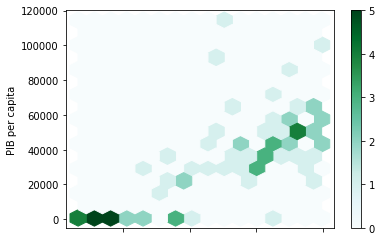

In [159]:
# Variante hexagonal 
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15)
# Invertimos el eje x
plt.gca().invert_xaxis()
# Nombramos los ejes
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Backlog:
- Autocorreletion plot
- Andrew curves
- Encontrar mejores datos?